In [28]:
# This is a script for creating the data file for LAMMPS
# The data file will provide the initial structure of the system and relevant information
# Stillinger-Weber Potentials, 1 molecule type

import numpy as np
import matplotlib.pyplot as plt
import math

L = 16 #length of box
N = np.power(L,3)*8 #number of molecules
a=6.35
m = 18.02; #masses -- g/mol for real units
 #Density augment -- achieves proper density
datafile = open('mw.data','w')

datafile.write("mW Model\n\n") #Title -- First line is skipped by lammps
datafile.write("%d atoms \n\n" %(N)) #Number of atoms; must match number in 'Atoms' section
datafile.write("1 atom types \n")


datafile.write("%lf %lf xlo xhi\n" %(0,L*a)) #Simulation box dimensions
datafile.write("%lf %lf ylo yhi\n" %(0,L*a))
datafile.write("%lf %lf zlo zhi\n" %(0,L*a))

datafile.write("\nMasses\n\n1 %lf\n" %(m))

datafile.write("\nAtoms\n\n") # Atoms list

# atom_style atomic
# Unique Atom ID/Atom type/x/y/z
#a1/2(x+y) a1/2(y+z) a1/2(x+z)
b=1
#corners
for i in range(0,L): 
    for j in range(0,L):
        for k in range(0,L):      
            datafile.write("%d 1 %lf %lf %lf\n" %((b,i*a,j*a,k*a)))
            b=b+1
#face centers
for i in range(0,L): 
    for j in range(0,L):
        for k in range(0,L):      
            datafile.write("%d 1 %lf %lf %lf\n" %((b,(i+1/2)*a,(j+1/2)*a,k*a)))
            b=b+1
for i in range(0,L): 
    for j in range(0,L):
        for k in range(0,L):      
            datafile.write("%d 1 %lf %lf %lf\n" %((b,i*a,(j+1/2)*a,(k+1/2)*a)))
            b=b+1
for i in range(0,L): 
    for j in range(0,L):
        for k in range(0,L):      
            datafile.write("%d 1 %lf %lf %lf\n" %((b,(i+1/2)*a,j*a,(k+1/2)*a)))
            b=b+1
#tetrahedron
for i in range(0,L): 
    for j in range(0,L):
        for k in range(0,L):      
            datafile.write("%d 1 %lf %lf %lf\n" %((b,(i+1/4)*a,(j+1/4)*a,(k+1/4)*a)))
            b=b+1

for i in range(0,L): 
    for j in range(0,L):
        for k in range(0,L):      
            datafile.write("%d 1 %lf %lf %lf\n" %((b,(i+3/4)*a,(j+1/4)*a,(k+3/4)*a)))
            b=b+1

for i in range(0,L): 
    for j in range(0,L):
        for k in range(0,L):      
            datafile.write("%d 1 %lf %lf %lf\n" %((b,(i+1/4)*a,(j+3/4)*a,(k+1/4)*a)))
            b=b+1

for i in range(0,L): 
    for j in range(0,L):
        for k in range(0,L):      
            datafile.write("%d 1 %lf %lf %lf\n" %((b,(i+1/4)*a,(j+3/4)*a,(k+3/4)*a)))
            b=b+1

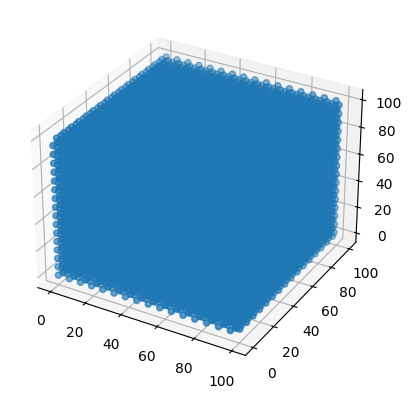

In [35]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')

loc = np.loadtxt('mw.data',skiprows=15)
x=np.array(loc[:,2])
y=np.array(loc[:,3])
z=np.array(loc[:,4])
ax.scatter(x,y,z)

plt.show()
